In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

from sklearn import linear_model
from random import shuffle
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

import wikipedia
import warnings
import random

from bs4 import BeautifulSoup
import requests
import re
from fuzzywuzzy import fuzz

/Users/xuanxu/anaconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:
df_music = pd.read_csv('../music_data/dataset-12-4.csv')

In [16]:
df_music

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount,followers,popularity
0,1,100.000000,Percy Faith,"Theme From ""A Summer Place""",1960,5001152,1180,9877,52
1,2,63.287830,Jim Reeves,He'll Have To Go,1960,4377343,4240,59717,59
2,3,48.428383,The Everly Brothers,Cathy's Clown,1960,4180758,4114,120725,63
3,30,10.594976,The Everly Brothers,Let It Be Me,1960,697716,4114,120725,63
4,70,6.056689,The Everly Brothers,So Sad,1960,804269,4114,120725,63
5,91,5.093692,The Everly Brothers,When Will I Be Loved,1960,508098,4114,120725,63
6,57,6.936216,The Everly Brothers,Walk Right Back,1961,2192314,4114,120725,63
7,47,7.877990,The Everly Brothers,Crying In The Rain,1962,3014478,4114,120725,63
8,4,40.053494,Johnny Preston,Running Bear,1960,1444980,444,2592,38
9,45,8.107365,Johnny Preston,Cradle Of Love,1960,232921,444,2592,38


In [3]:
df_music.describe(include='all')

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount,followers,popularity
count,987.000000,987.000000,987,987,987.000000,9.870000e+02,987.000000,9.870000e+02,987.000000
unique,NaN,NaN,543,975,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,The Beatles,Dedicated To The One I Love,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23,2,NaN,NaN,NaN,NaN,NaN
mean,50.496454,11.708669,NaN,NaN,1964.513678,8.002504e+06,3359.658561,3.067930e+05,50.727457
std,28.955074,12.776220,NaN,NaN,2.879346,2.003319e+07,3957.353059,8.630806e+05,19.093867
min,1.000000,4.786301,NaN,NaN,1960.000000,1.728000e+03,108.000000,1.900000e+01,4.000000
25%,25.000000,5.761896,NaN,NaN,1962.000000,2.501365e+05,951.000000,4.208000e+03,36.000000
50%,50.000000,7.562751,NaN,NaN,1965.000000,9.563520e+05,1952.000000,2.786600e+04,52.000000
75%,75.500000,11.949771,NaN,NaN,1967.000000,5.058133e+06,4169.000000,1.207250e+05,65.000000


In [4]:
df_grammy=pd.read_csv('../music_data/grammy_new.csv')

In [10]:
del df_grammy['Year_awards']

In [12]:
del df_grammy['Artist_award']

In [17]:
df_music1=df_music.merge(df_grammy, how='left', on='Title')

In [19]:
del df_music1['Rank_y']
del df_music1['RankPowerlaw_y']
del df_music1['Artist_y']
del df_music1['Year_y']
del df_music1['SpotifyPlayCount_y']
del df_music1['WikiWordCount_y']

In [21]:
df_music1.columns=['Rank','RankPowerlaw','Artist','Title','Year','SpotifyPlayCount','WikiWordCount',
                   'followers','popularity','Awards','awardscore']

In [23]:
df_music=df_music1

In [43]:
df_music1.to_csv('dataset_awards_genre.csv')

# 0 Utility

In [24]:
def z_score_norm(df, feature_list):
    """ Do the z-score method on selected features in feature_list. 
        z = (x - mean)/std

    Args:
        df (pandas.DataFrame): data set
        feature_list   (list): a list of features, each element is a string
    """
    
    for col in feature_list:
        df[col] = (df[col] - df[col].mean())/(df[col].std())
        
        
        
def do_log(df, feature_list):
    '''Do logarithm on selected features in feature_list.
    
    Args:
        df (pandas.DataFrame): data set
        feature_list   (list): a list of features, each element is a string
    '''
    
    for col in feature_list:
        df[col] = np.log(df[col])
        
        
        
def powerlaw_rank(df_music):
    ''' Do powerlaw on the original rank.
        y = 100*rank^(-0.66)
        However, I find that differnent coefficient and exponent do not affect MAE. Don't know why.
    
    Args:
        df_music (pandas.DataFrame): dataset
    '''
    
    df_music.insert(1, 'RankPowerlaw', df_music.Rank)  # insert right next to column 'Rank'
    df_music['RankPowerlaw'] = df_music['RankPowerlaw'].astype('float')
    for i in range(0, len(df_music)):
        df_music.iat[i,1] = 100 * math.pow(df_music.iat[i,1], -0.66)

In [25]:
def performance_statistics(model_name, target, pred):
    '''Plot a table of performance statistics
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    mae   = mean_absolute_error(target, pred)
    medae = median_absolute_error(target, pred)
    r2    = r2_score(target, pred)
    
    columns = ['Model', 'Mean Absolute Error', 'Median Absolute Error', 'R2 Score']
    cell_text = [['%s' % model_name, '%1.3f' % mae, '%1.3f' % medae, '%1.3f' % r2]]
    
    nrow = 1
    ncol = len(columns)
    
    fig = plt.figure(figsize=(ncol*2, nrow*0.2))
    ax = fig.add_subplot(111)
    ax.axis('off')
    
    table = ax.table(cellText=cell_text, colLabels=columns, loc='center')
    table.set_fontsize(14)
    table.scale(1.5, 1.5)
    
    
    
def error_distribution(model_name, target, pred):
    '''Plot a histogram of the error distribution
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    err = pred - target   # error is a Series
    min_err = err.min()
    max_err = err.max()
    fig = plt.figure()
    ax = err.plot.hist(bins=20, figsize=(7,7), edgecolor='black')
    ax.set_xticks(np.arange(math.floor(min_err), math.ceil(max_err)))
    ax.set_title('%s - Error Distribution' % model_name, fontsize=18)
    ax.set_xlabel('Error', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.grid()
    
    fig.savefig('../figure/%s_error_dist.png' % model_name)
    
    

def prediction_error_map(model_name, target, pred):
    '''Plot the prediction error map (similar to confusion matrices in classification problems)
    
    Args:
        target (Series):  target data
        pred   (ndarray): predition results
    '''
    y_min = target.min()*0.98
    y_max = target.max()*1.01
    fig, ax = plt.subplots(figsize=(7,7))
    #plt.scatter(target, pred, edgecolor='black', s=15)
    plt.scatter(target, pred, s=13)
    ax.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2)
    ax.set_xticks(np.arange(math.floor(y_min),math.ceil(y_max)))
    ax.set_yticks(np.arange(math.floor(y_min),math.ceil(y_max)))
    ax.set_title('%s - Prediction Error Map' % model_name, fontsize=18)
    #ax.set_xlabel('Real Spotify (log) Play Count', fontsize=14)
    ax.set_xlabel('Target', fontsize=14)
    ax.set_ylabel('Prediction', fontsize=14)
    #ax.axis([y_min,y_max,y_min,y_max])
    ax.grid()
    
    fig.savefig('../figure/%s_error_map.png' % model_name)
    
    
    
def permutation_test(model,target,pred):
    '''do permuation tests
    
    Args:
        model_name: model
        target (Series):  target data
        pred   (ndarray): predition results
    ''' 
    pred = cross_val_predict(model, X=feature, y=target, cv=10)
    mae  = mean_absolute_error(target,pred)
    mae_list=[mae]
    count=0
    while count<100:
        count = count+1 
        target_to_list = target.tolist()
        shuffle(target_to_list)
        target_per = pd.DataFrame({'playcount':target_to_list})
        pred1 = cross_val_predict(model, X=feature, y=target_per, cv=10)
        mae_shuffle = mean_absolute_error(target,pred1)
        mae_list.append(mae_shuffle)
    num_bins = 20
    fig, ax = plt.subplots(figsize=(7,7))
    n, bins, patches = ax.hist(mae_list, num_bins)
    ax.set_title('Permutation test')
    ax.set_xlabel('$Log(playcount)-mae$', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)
    ax.get_children()[0].set_color('r')
    ax.grid()
    
    
    
def evaluation(model, feature, target):
    """ Run the model on X and y using cross validation. Then output:
        1) performance statistics
        2) error distributions
        3) prediction error map
        
    Args:
        model   (object):    the machine learning object to fit the data
        feature (DataFrame): feature data
        target  (Series):    target  data
        
    This is version 0.11.10 (Nov. 10th)
    
    Todo:
        parameter "model" should be a list of models in the future
    """
    
    model_name = str(model)        # 'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)'
    end = model_name.find('(')
    model_name = model_name[0:end] # 'LinearRegression'
    
    '''Do the prediction by cross validation'''
    pred = cross_val_predict(model, X=feature, y=target, cv=10)  # default is 10-fold
    
    print('This is the plots/reports of %s'  % model_name)
        
    error_distribution(model_name, target, pred)
    
    prediction_error_map(model_name, target, pred)
    
    #permutation_test(model, target, pred)
    
    performance_statistics(model_name, target, pred)    

# 1 Baseline

In [26]:
df_music.head()

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount,followers,popularity,Awards,awardscore
0,1,100.000000,Percy Faith,"Theme From ""A Summer Place""",1960,5001152,1180,9877,52,Record Of The Year,2
1,2,63.287830,Jim Reeves,He'll Have To Go,1960,4377343,4240,59717,59,0,0
2,3,48.428383,The Everly Brothers,Cathy's Clown,1960,4180758,4114,120725,63,0,0
3,30,10.594976,The Everly Brothers,Let It Be Me,1960,697716,4114,120725,63,0,0
4,30,10.594976,The Everly Brothers,Let It Be Me,1960,697716,4114,120725,63,0,0


In [27]:
do_log(df_music, feature_list=['RankPowerlaw', 'SpotifyPlayCount', 'WikiWordCount'])

In [28]:
z_score_norm(df_music, feature_list=['Rank', 'RankPowerlaw', 'Year', 'WikiWordCount'])

In [38]:
feature = df_music.loc[:,['RankPowerlaw', 'Year', 'WikiWordCount','followers','popularity','awardscore']]
target  = df_music.loc[:,['SpotifyPlayCount']]

In [39]:
lr = linear_model.LinearRegression()

In [40]:
reg = linear_model.Ridge (alpha = .8)

This is the plots/reports of LinearRegression


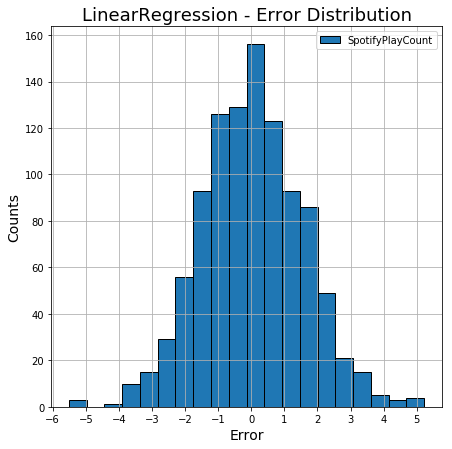

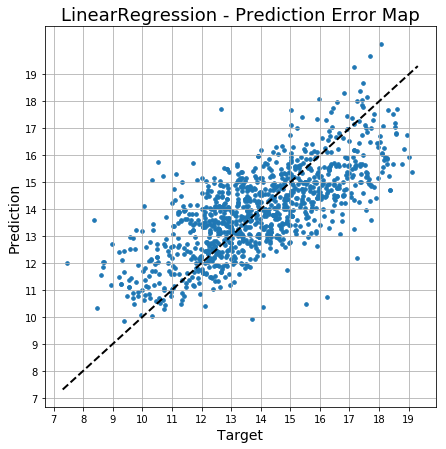

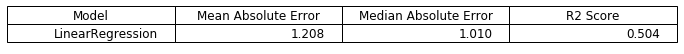

In [41]:
evaluation(lr, feature, target)

In [42]:
pred = cross_val_predict(lr, X=feature, y=target, cv=10)  # default is 10-fold

# Twenty Best

In [14]:
best = target - pred

In [15]:
best.insert(0, 'Prediction', pred)

In [16]:
best.insert(0, 'Target', target)

In [17]:
best.describe()

,Target,Prediction,SpotifyPlayCount
count,987.000000,987.000000,987.000000
mean,13.894324,13.896237,-0.001914
std,2.169542,1.314378,1.729986
min,7.454720,10.356239,-6.344982
25%,12.429750,12.999553,-1.173167
50%,13.770881,13.796711,-0.077178
75%,15.436479,14.753006,1.148544
max,19.119101,18.645882,6.719538


In [18]:
best_index = best.nlargest(20, columns='SpotifyPlayCount').index

In [19]:
best.nlargest(20, columns='SpotifyPlayCount')

,Target,Prediction,SpotifyPlayCount
826,19.119101,12.399562,6.719538
91,18.355697,13.073865,5.281832
259,17.907229,12.733936,5.173293
125,16.255563,11.233304,5.022259
180,16.674597,11.904866,4.769731
276,17.717049,13.351527,4.365522
842,17.322973,13.051946,4.271027
872,17.636537,13.412611,4.223926
230,15.707082,11.514579,4.192503
179,15.887576,11.870127,4.017449


In [20]:
df_music.iloc[best_index, :]

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount
826,1.260696,-0.897742,Marvin Gaye and Tammi Terrell,Ain't No Mountain High Enough,0.863502,19.119101,-1.174632
91,1.018942,-0.806925,Sam Cooke,Wonderful World,-1.567605,18.355697,0.368054
259,0.431826,-0.548283,Ben E. King,Stand By Me,-1.220304,17.907229,-0.296113
125,0.017391,-0.319503,Billy Bland,Let The Little Girl Dance,-1.567605,16.255563,-1.928709
180,1.640595,-1.026644,Maurice Williams and the Zodiacs,Stay,-1.567605,16.674597,-0.879462
276,1.536986,-0.992983,Dave Brubeck,Take Five,-1.220304,17.717049,0.584854
842,-0.086218,-0.253867,Scott Mckenzie,San Francisco (Be Sure to Wear Flowers in Your...,0.863502,17.322973,-0.934510
872,1.053478,-0.820375,Cream,White Room,1.210803,17.636537,-0.370465
230,-0.362508,-0.056471,Marcels,Blue Moon,-1.220304,15.707082,-1.803164
179,1.606059,-1.015540,Barrett Strong,Money,-1.567605,15.887576,-0.919181


In [21]:
lr2 = linear_model.LinearRegression()

In [22]:
lr2.fit(feature, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
feature.head()

,RankPowerlaw,Year,WikiWordCount
0,3.937389,-1.567605,-0.494041
1,3.186936,-1.567605,0.734592
2,2.747948,-1.567605,0.705613
3,0.254995,-1.567605,0.705613
4,-0.662354,-1.567605,0.705613


In [24]:
lr2.coef_

array([[ 0.59059588,  0.40435267,  1.02011652]])

# Twenty Worst

In [25]:
best.nsmallest(20, columns='SpotifyPlayCount')

,Target,Prediction,SpotifyPlayCount
737,8.377471,14.722454,-6.344982
578,10.539509,15.873371,-5.333862
864,9.691964,14.651270,-4.959306
515,9.375601,14.253891,-4.878290
519,8.679822,13.454378,-4.774556
227,7.454720,12.209741,-4.755021
715,11.114401,15.813829,-4.699428
520,8.678632,13.258019,-4.579388
174,8.603371,13.105400,-4.502030
959,10.271043,14.732205,-4.461162


In [26]:
worst_index = best.nsmallest(20, columns='SpotifyPlayCount').index

In [27]:
df_music.iloc[worst_index, :]

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount
737,1.709667,-1.048517,Paul Revere and The Raiders,Let Me,1.558105,8.377471,0.718370
578,0.224608,-0.439925,The Temptations,"Run Away Child, Running Wild",1.558105,10.539509,1.511440
864,1.433377,-0.958242,Bill Cosby,Little Ole Man (Uptight-Everything's Alright),0.863502,9.691964,1.030056
515,-1.087770,0.749516,The Ray Charles Singers,Love Me with All Your Heart (Cuando Calienta E...,-0.178401,9.375601,-0.039515
519,0.569971,-0.614930,The Dave Clark Five,Can't You See That She's Mine,-0.178401,8.679822,-0.030932
227,-0.500653,0.057600,Linda Scott,Don't Bet Money Honey,-1.220304,7.454720,-1.181268
715,-1.329524,1.247041,Roger Williams,Born Free,0.516201,11.114401,0.915937
520,1.398841,-0.946409,The Dave Clark Five,Do You Love Me,-0.178401,8.678632,-0.030932
174,1.295232,-0.910115,Annette Funicello,O Dio Mio,-1.567605,8.603371,0.207344
959,-0.327972,-0.083205,Bobby Sherman,Little Woman,1.558105,10.271043,0.240497


# 2 One Hot Encoding

In [252]:
df = pd.DataFrame({'Genre':['pop', 'r&b', 'country','pop', 'r&b', 'country','folk', 'rock and row'],
                   'WordCount': np.random.randn(8,)})

In [253]:
df

,Genre,WordCount
0,pop,0.590215
1,r&b,-0.213398
2,country,0.760691
3,pop,-0.133835
4,r&b,0.060788
5,country,-0.418949
6,folk,1.199795
7,rock and row,0.026890


In [254]:
pd.get_dummies(df.Genre)

,country,folk,pop,r&b,rock and row
0,0,0,1,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1


# 3 Add Followers and PopIndex to Dataframe

In [351]:
df_music = pd.read_csv('../music_data/dataset-12-3.csv')

In [352]:
df_music = df_music.drop(['URL', 'external_urls', 'genres'], axis=1)

In [353]:
df_music.describe()

,Rank,RankPowerlaw,Year,SpotifyPlayCount,WikiWordCount,followers,popularity
count,987.000000,987.000000,987.000000,9.870000e+02,987.000000,9.870000e+02,987.000000
mean,50.496454,11.708669,1964.513678,8.002504e+06,3359.658561,3.067930e+05,50.727457
std,28.955074,12.776220,2.879346,2.003319e+07,3957.353059,8.630806e+05,19.093867
min,1.000000,4.786301,1960.000000,1.728000e+03,108.000000,1.900000e+01,4.000000
25%,25.000000,5.761896,1962.000000,2.501365e+05,951.000000,4.208000e+03,36.000000
50%,50.000000,7.562751,1965.000000,9.563520e+05,1952.000000,2.786600e+04,52.000000
75%,75.500000,11.949771,1967.000000,5.058133e+06,4169.000000,1.207250e+05,65.000000
max,100.000000,100.000000,1969.000000,2.010574e+08,19546.000000,5.042014e+06,89.000000


In [356]:
df_music.head()

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount,followers,popularity
0,1,100.000000,Percy Faith,"Theme From ""A Summer Place""",1960,5001152,1180,9877,52
1,2,63.287830,Jim Reeves,He'll Have To Go,1960,4377343,4240,59717,59
2,3,48.428383,The Everly Brothers,Cathy's Clown,1960,4180758,4114,120725,63
3,30,10.594976,The Everly Brothers,Let It Be Me,1960,697716,4114,120725,63
4,70,6.056689,The Everly Brothers,So Sad,1960,804269,4114,120725,63


In [358]:
df_music.to_csv('../music_data/dataset-12-4.csv', index=False)

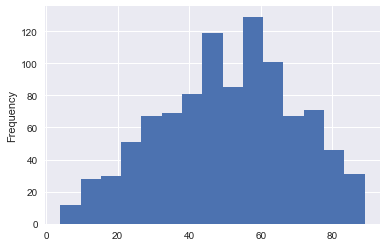

In [330]:
df_music.popularity.plot.hist(bins=15)

In [334]:
df_music2 = df_music.copy()

In [335]:
df_music2.rename(columns={'followers':'Followers', 'popularity':'Popularity'}, inplace=True)

Do log to the following features:
1. SpotifyPlayCount (target)
2. RankPowerlaw
3. WikiWordCount
4. Followers

In [336]:
df_music2.SpotifyPlayCount = np.log(df_music2.SpotifyPlayCount)
df_music2.RankPowerlaw = np.log(df_music2.Followers)
df_music2.WikiWordCount = np.log(df_music2.WikiWordCount)
df_music2.Followers = np.log(df_music2.Followers)

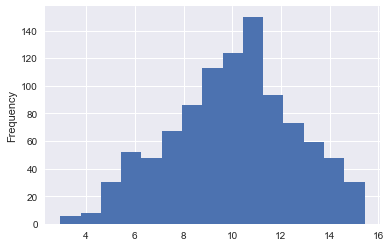

In [337]:
df_music2.Followers.plot.hist(bins=15)

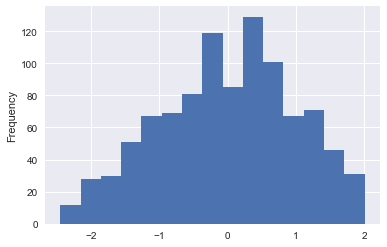

In [354]:
df_music2.Popularity.plot.hist(bins=15)

In [338]:
df_music2.head()

,Rank,RankPowerlaw,Artist,Title,Year,SpotifyPlayCount,WikiWordCount,Followers,Popularity
0,1,9.197964,Percy Faith,"Theme From ""A Summer Place""",1960,15.425179,7.073270,9.197964,52
1,2,10.997372,Jim Reeves,He'll Have To Go,1960,15.291952,8.352319,10.997372,59
2,3,11.701271,The Everly Brothers,Cathy's Clown,1960,15.246003,8.322151,11.701271,63
3,30,11.701271,The Everly Brothers,Let It Be Me,1960,13.455567,8.322151,11.701271,63
4,70,11.701271,The Everly Brothers,So Sad,1960,13.597689,8.322151,11.701271,63


In [339]:
df_music2.describe()

,Rank,RankPowerlaw,Year,SpotifyPlayCount,WikiWordCount,Followers,Popularity
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,50.496454,10.038611,1964.513678,13.894324,7.579075,10.038611,50.727457
std,28.955074,2.608189,2.879346,2.169542,1.049942,2.608189,19.093867
min,1.000000,2.944439,1960.000000,7.454720,4.682131,2.944439,4.000000
25%,25.000000,8.344743,1962.000000,12.429750,6.857514,8.344743,36.000000
50%,50.000000,10.235163,1965.000000,13.770881,7.576610,10.235163,52.000000
75%,75.500000,11.701271,1967.000000,15.436479,8.335431,11.701271,65.000000
max,100.000000,15.433316,1969.000000,19.119101,9.880526,15.433316,89.000000


Do z-score to the following feature
1. RankPowerlaw
2. WikiWordCount
3. Followers
4. Popularity

In [341]:
feature_list = ['RankPowerlaw', 'WikiWordCount', 'Followers', 'Popularity']
z_score_norm(df_music2, feature_list)

In [344]:
z_score_norm(df_music2, ['Year'])

In [345]:
df_music2.describe()

,Rank,RankPowerlaw,Year,SpotifyPlayCount,WikiWordCount,Followers,Popularity
count,987.000000,9.870000e+02,9.870000e+02,987.000000,9.870000e+02,9.870000e+02,9.870000e+02
mean,50.496454,-1.264102e-15,-2.273449e-14,13.894324,3.276451e-15,-1.264102e-15,-1.842779e-16
std,28.955074,1.000000e+00,1.000000e+00,2.169542,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-2.719960e+00,-1.567605e+00,7.454720,-2.759147e+00,-2.719960e+00,-2.447250e+00
25%,25.000000,-6.494420e-01,-8.730030e-01,12.429750,-6.872390e-01,-6.494420e-01,-7.713187e-01
50%,50.000000,7.535957e-02,1.689002e-01,13.770881,-2.347950e-03,7.535957e-02,6.664669e-02
75%,75.500000,6.374767e-01,8.635024e-01,15.436479,7.203795e-01,6.374767e-01,7.474936e-01
max,100.000000,2.068372e+00,1.558105e+00,19.119101,2.191980e+00,2.068372e+00,2.004442e+00


In [346]:
target = df_music2.loc[:,'SpotifyPlayCount']
feature_list = ['RankPowerlaw', 'WikiWordCount', 'Followers', 'Popularity', 'Year']
feature = df_music2.loc[:, feature_list]

In [349]:
lr = linear_model.LinearRegression()

This is the plots/reports of LinearRegression


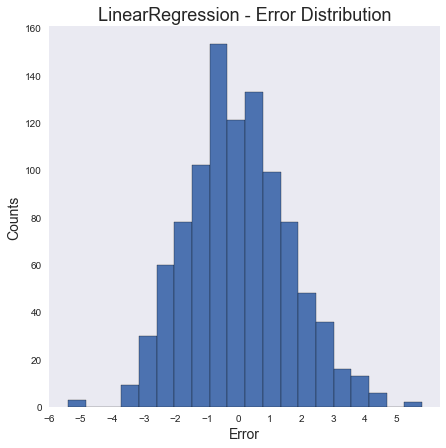

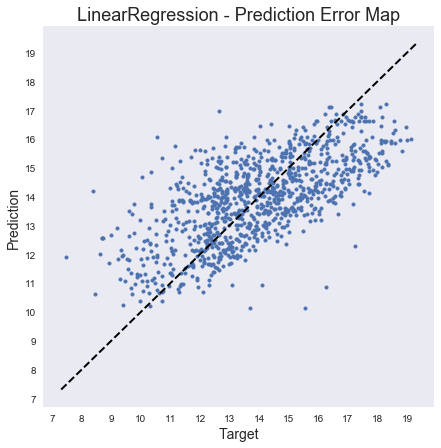

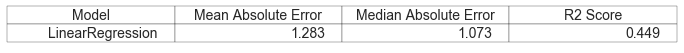

In [350]:
evaluation(lr, feature, target)

In [305]:
df_genre = df_genre[['Title', 'GenreRaw']]